## Assigment: Neural network basics

Soft deadline: 16.09.18 at 23.59

Hard deadline: 18.09.18 at 23.59

For this task I intentionally provide no boilerplate code, because very puprpose of this task is getting you comforatable with basic code template for desiging NNs in pytorch. I higly recommend you to revisit all the last seminar materials.

#### Task

* Implement simple **fully-convolutional** neural architecture for classification. Make sure it is small enought to run on your home machine.
* Provide dataset visulization.
* Provide train/test split and validation

#### Requirements

* Architecture should derive from `torch.nn.Module`
* Use `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`. But if you manage co simplify this step using dataset `torchivision`, I will only encourage you.
* Implement at least one data transformer, but make sure it is useful for classification task.
* Use FashionMNIST dataset https://github.com/zalandoresearch/fashion-mnist
* Make sure you can fix random seed for all components of your code to make experiments reproducible
* Since you architecure should be fully-convolutional, make sure it does not depend on input size.

In [8]:
import torch
from IPython import display
import matplotlib.pyplot as plt
import numpy as np

import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
import torch.nn as nn
import torch.nn.functional as F

dataset_folder = './dataset'

torch.manual_seed(1)
np.random.seed(1)

training_dataset = FashionMNIST(dataset_folder, train=True, download=True, transform=torchvision.transforms.ToTensor())
test_dataset = FashionMNIST(dataset_folder, train=False, download=True, transform=torchvision.transforms.ToTensor())

Training epoch  1
Average loss in train data: 0.63182
Average loss in test data: 0.64602
Training epoch  2
Average loss in train data: 0.53944
Average loss in test data: 0.55833
Training epoch  3
Average loss in train data: 0.49566
Average loss in test data: 0.51656
Training epoch  4
Average loss in train data: 0.46205
Average loss in test data: 0.48815
Training epoch  5
Average loss in train data: 0.43215
Average loss in test data: 0.45786
Training epoch  6
Average loss in train data: 0.40633
Average loss in test data: 0.43462
Training epoch  7
Average loss in train data: 0.40718
Average loss in test data: 0.43801
Training epoch  8
Average loss in train data: 0.39265
Average loss in test data: 0.42668
Training epoch  9
Average loss in train data: 0.38375
Average loss in test data: 0.41851
Training epoch  10
Average loss in train data: 0.37602
Average loss in test data: 0.41355
Training epoch  11
Average loss in train data: 0.35763
Average loss in test data: 0.39787
Training epoch  12


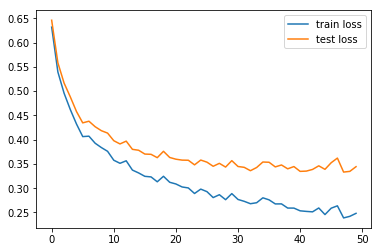

In [24]:
class MyConvNet(torch.nn.Module):
    def __init__(self):
        super(MyConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, 5, 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc1 = nn.Linear(20, 60)
        self.fc2 = nn.Linear(60, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
def train(network, training_dataset, test_dataset, batch=200, epochs=50):
    train_loader = DataLoader(training_dataset, batch_size=batch, shuffle=True)
    test_loader  = DataLoader(test_dataset, batch_size=batch, shuffle=True)
    loss = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(network.parameters(), lr=1e-3)
    
    def avg_value(data):
        s = 0.0
        for input_data, labels in data:
            outputs = network(input_data)
            s += loss(outputs, labels).item()

        return s / len(data)
    
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        print("Training epoch ", epoch + 1)
        for input_data, labels in train_loader:
            optim.zero_grad()
            outputs = network(input_data)

            loss_val = loss(outputs, labels)
            loss_val.backward()
            optim.step()
            
        train_loss = avg_value(train_loader)
        test_loss = avg_value(test_loader)
        print("Average loss in train data: %0.5f" % train_loss)
        print("Average loss in test data: %0.5f" %  test_loss)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
    plt.clf()
    plt.plot(train_losses, label='train loss')
    plt.plot(test_losses, label='test loss')
    plt.legend()
    plt.show()
        
train(MyConvNet(), training_dataset, test_dataset)